In [28]:
import json
with open("/Users/talenrimmer/Desktop/CV4E_Code/data/21209-lazo-1-2024-05-22.json",'r') as file:
    data = json.load(file)

In [29]:
import pandas as pd

imagedf = pd.DataFrame(data["images"])

annotationsdf = pd.DataFrame(data["annotations"])

categoriesdf = pd.DataFrame(data["categories"])

categoriesdf.sample(5)

annotationsdf.columns

# Rename the columns in each dataframe so they all represent their id
categoriesdf.rename(columns={'id': 'category_id'}, inplace=True)

annotationsdf.rename(columns={'id': 'annotations_id'}, inplace=True)

imagedf.rename(columns={'id': 'image_id'}, inplace=True)


In [30]:
# Print the JSON structure
### print(json.dumps(data["annotations"], indent=4))

In [31]:
merged_df = pd.merge(annotationsdf, imagedf, on='image_id', how='outer')
# merged_df.sample(5)



In [32]:
# Check unique image_id counts in each DataFrame
annotations_count = annotationsdf['image_id'].nunique()
images_count = imagedf['image_id'].nunique()
merged_count = merged_df['image_id'].nunique()

print(f"Unique image_id in annotationsdf: {annotations_count}")
print(f"Unique image_id in imagedf: {images_count}")
print(f"Unique image_id in merged_df: {merged_count}")

# Verify all rows are retained
annotations_rows = len(annotationsdf)
images_rows = len(imagedf)
merged_rows = len(merged_df)

print(f"Rows in annotationsdf: {annotations_rows}")
print(f"Rows in imagedf: {images_rows}")
print(f"Rows in merged_df: {merged_rows}")

# Check for missing values in image_id column
missing_image_ids = merged_df['image_id'].isna().sum()
print(f"Missing image_id rows in merged_df: {missing_image_ids}")


Unique image_id in annotationsdf: 164
Unique image_id in imagedf: 164
Unique image_id in merged_df: 164
Rows in annotationsdf: 14421
Rows in imagedf: 164
Rows in merged_df: 14421
Missing image_id rows in merged_df: 0


In [33]:
# Merging all rows and images by image_id:



all_images = pd.merge(imagedf, annotationsdf,
         how = 'outer', on = 'image_id')

all_images.sample(5)

,height,width,image_id,file_name,longitude,latitude,segmentation,iscrowd,area,bbox,category_id,annotations_id
4735,4872,5568,5992802,GOPR1813.JPG,None,None,"[[3137.8200000000265, 1772.412500000003, 3140....",0,5828.418232,"[3092.137700452709, 1671.3898293426982, 57.374...",420108,42195547
2057,4872,5568,5992482,GOPR1493.JPG,None,None,"[[3086.970000000001, 2513.237500000001, 3086.0...",0,4807.605378,"[2993.738994381758, 2506.9365438695204, 93.712...",420119,41662217
10479,4872,5568,5993702,GOPR2713.JPG,None,None,"[[749.1399999999994, 2839.099999999999, 749.43...",0,21209.194458,"[526.4661455917537, 2769.108865317777, 222.967...",420108,41666037
9781,4872,5568,5993684,GOPR2695.JPG,None,None,"[[3487.7574999999692, 2606.7074999999923, 3487...",0,21792.312200,"[3249.8874999999916, 2553.1853107785523, 237.8...",420070,41648370
6650,4872,5568,5993186,GOPR2197.JPG,None,None,"[[1483.5574999999913, 670.6800000000005, 1480....",0,18873.219907,"[1347.3228453544284, 656.0999659980915, 144.05...",420073,42233716


In [34]:
# Check for NA values in the 'name' column
na_values = all_images['annotations_id'].isna()

# Display rows where 'name' column has NA values
missing_values = all_images[na_values]

print(missing_values)

Empty DataFrame
Columns: [height, width, image_id, file_name, longitude, latitude, segmentation, iscrowd, area, bbox, category_id, annotations_id]
Index: []


In [35]:
# Merge annotations and images by image_id

annotations_images = pd.merge(annotationsdf, imagedf,
         how = 'left', on = 'image_id')

merged_df = pd.merge(annotations_images, categoriesdf,
         how = 'left', on = "category_id")

merged_df.sample(5)

,segmentation,iscrowd,area,image_id,bbox,category_id,annotations_id,height,width,file_name,longitude,latitude,name
7583,"[[925.9599999999907, 1833.8324999999986, 922.6...",0,15234.739509,5992494,"[809.3401507913613, 1824.982479240689, 124.629...",420108,42191926,4872,5568,GOPR1505.JPG,None,None,Sch. C. Pallasii
8691,"[[2769.4400000000023, 503.000000000005, 2768.6...",0,1166.938219,5992802,"[2761.590001863388, 503.000000000005, 15.44999...",420108,42195432,4872,5568,GOPR1813.JPG,None,None,Sch. C. Pallasii
217,"[[2699.050000000007, 3560.159999999997, 2695.2...",0,53519.867026,5991897,"[2443.6582016059006, 3550.061049378252, 259.59...",420073,41627182,4872,5568,GOPR0908.JPG,None,None,Forage Fish
10576,"[[1431.4475000000023, 1930.7699999999913, 1429...",0,48925.768340,5993515,"[1084.5963643669477, 1895.4789325317824, 347.2...",420108,42199089,4872,5568,GOPR2526.JPG,None,None,Sch. C. Pallasii
0,"[[2158.4725000000026, 232.76250000000073, 2155...",0,20144.374183,5991860,"[1995.9584548272144, 208.02869137457458, 165.5...",420073,41626886,4872,5568,GOPR0871.JPG,None,None,Forage Fish


In [36]:
# subsetting data such that we just see the IDs, the file name, and the name of the animal
shortened_df = merged_df[["image_id", "category_id", "annotations_id", "file_name", "name"]]
# min_df = merged_df[["annotations_id", "file_name", "name"]]

shortened_df

,image_id,category_id,annotations_id,file_name,name
0,5991860,420073,41626886,GOPR0871.JPG,Forage Fish
1,5991860,420073,41626887,GOPR0871.JPG,Forage Fish
2,5991860,420073,41626888,GOPR0871.JPG,Forage Fish
3,5991860,420073,41626889,GOPR0871.JPG,Forage Fish
4,5991860,420073,41626890,GOPR0871.JPG,Forage Fish
...,...,...,...,...,...
14416,5993207,420108,42238793,GOPR2218.JPG,Sch. C. Pallasii
14417,5993207,420108,42238794,GOPR2218.JPG,Sch. C. Pallasii
14418,5993207,420108,42238795,GOPR2218.JPG,Sch. C. Pallasii
14419,5993207,420108,42238796,GOPR2218.JPG,Sch. C. Pallasii


In [37]:
# Define the list of names to mark as True
forage_fish_names = [
    'Forage Fish',
    'Sch. A. personatus',
    'Ex. C. Pallasii',
    'Sch. C. Pallasii',
    'Ex. C. aggregata',
    'Sch. C. aggregata',
    'A. personatus (Pacific Sand Lance)',
    'Ex. A. personatus'
]

# Create a new column 'forage fish' with True/False values based on the condition
shortened_df['is_forage_fish'] = shortened_df['name'].isin(forage_fish_names)



#and then remove rows that contain the file_name values "GOPR3002.JPG" and "GOPR3270.JPG":
shortened_df = shortened_df[~shortened_df['file_name'].isin(['GOPR3002.JPG', 'GOPR3270.JPG'])]
#Now query the dataframe to make sure the rows have been removed (return false if the rows are still present):
assert not shortened_df['file_name'].isin(['GOPR3002.JPG', 'GOPR3270.JPG']).any()

#Remove rows with a specific image_id value:
shortened_df = shortened_df[~shortened_df['image_id'].isin(['5993725', '5992343'])]
#Now query the dataframe to make sure the rows have been removed (return false if the rows are still present):
assert not shortened_df['image_id'].isin(['5993725', '5992343']).any()

shortened_df.sample(10)

# #Creating a list of value counts for each name
# histogram = min_df['name'].value_counts()

# histogram

/var/folders/bh/fk66vry957b2pddbb9fjfqqr0000gn/T/ipykernel_5526/203942899.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shortened_df['is_forage_fish'] = shortened_df['name'].isin(forage_fish_names)


,image_id,category_id,annotations_id,file_name,name,is_forage_fish
2268,5993717,420073,41648715,GOPR2728.JPG,Forage Fish,True
1460,5992482,420119,41630220,GOPR1493.JPG,Sch. A. personatus,True
4280,5993702,420108,41665915,GOPR2713.JPG,Sch. C. Pallasii,True
5342,5993932,420108,41667706,GOPR2943.JPG,Sch. C. Pallasii,True
3721,5993707,420108,41665329,GOPR2718.JPG,Sch. C. Pallasii,True
1393,5992482,420119,41630150,GOPR1493.JPG,Sch. A. personatus,True
3799,5993707,420108,41665413,GOPR2718.JPG,Sch. C. Pallasii,True
6419,5992792,420073,41670796,GOPR1803.JPG,Forage Fish,True
6755,5993932,420108,41674144,GOPR2943.JPG,Sch. C. Pallasii,True
4439,5993702,420108,41666076,GOPR2713.JPG,Sch. C. Pallasii,True


Text(0.5, 1.0, 'Proportion of False vs True in Forage Fish Column')

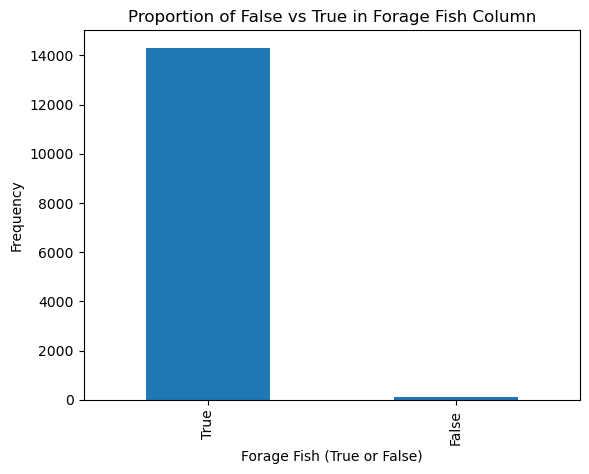

In [38]:
import matplotlib.pyplot as plt
# Count the occurrences of True and False in the 'forage fish' column
counts = shortened_df['is_forage_fish'].value_counts()
counts

# Plot a histogram
counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Forage Fish (True or False)')
plt.ylabel('Frequency')
plt.title('Proportion of False vs True in Forage Fish Column')

# Show the plot
# plt.show()


In [39]:
# Creating a new list 

import os
import pandas as pd

for image in os.listdir('/Users/talenrimmer/Desktop/CV4E_Code/images'):
    image_without_ext = image.replace('.jpg', '')
    image_without_ext = int(image_without_ext)
    # print(image_without_ext)
    # print(type(image_without_ext))
    # print(type(shortened_df['image_id'].values[0]))
    if not image_without_ext in shortened_df['image_id'].values:
        #add it as a row to the dataset with some values
        #add as a row to the dataset with some values
        new_row = {'image_id': image_without_ext, 'category_id': 'NaN', 'annotations_id': 'NaN', 'file_name': 'NaN', 'name': 'Empty', 'is_forage_fish': False}
        new_row = pd.DataFrame(new_row, index=[0])
    # else: 
    #     print('False')
    # add new row to dataframe
        shortened_df = pd.concat([shortened_df, new_row], ignore_index=True)
      
shortened_df



,image_id,category_id,annotations_id,file_name,name,is_forage_fish
0,5991860,420073,41626886,GOPR0871.JPG,Forage Fish,True
1,5991860,420073,41626887,GOPR0871.JPG,Forage Fish,True
2,5991860,420073,41626888,GOPR0871.JPG,Forage Fish,True
3,5991860,420073,41626889,GOPR0871.JPG,Forage Fish,True
4,5991860,420073,41626890,GOPR0871.JPG,Forage Fish,True
...,...,...,...,...,...,...
17132,5992096,NaN,NaN,NaN,Empty,False
17133,5992082,NaN,NaN,NaN,Empty,False
17134,5994395,NaN,NaN,NaN,Empty,False
17135,5992914,NaN,NaN,NaN,Empty,False


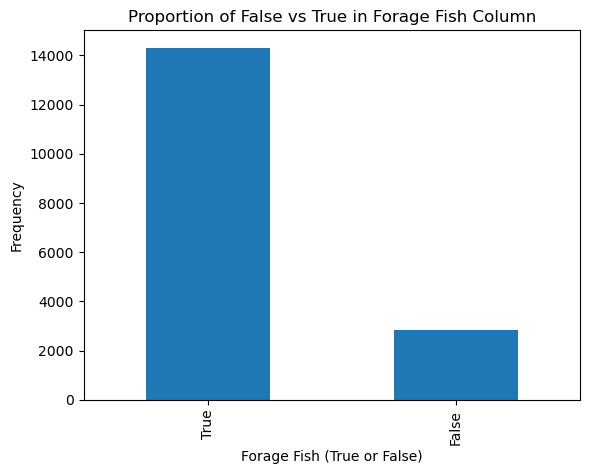

In [40]:
import matplotlib.pyplot as plt
# Count the occurrences of True and False in the 'forage fish' column
counts = shortened_df['is_forage_fish'].value_counts()
counts

# Plot a histogram
counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Forage Fish (True or False)')
plt.ylabel('Frequency')
plt.title('Proportion of False vs True in Forage Fish Column')

# Show the plot
plt.show()

In [41]:
# #Creating a list of value counts for each name
histogram = shortened_df['name'].value_counts()

histogram

name
Sch. C. Pallasii                      8453
Forage Fish                           3283
Empty                                 2717
Sch. A. personatus                    2171
Ex. C. Pallasii                        322
Actinopterygii                          97
Ex. A. personatus                       68
Sch. C. aggregata                        6
Ex. C. aggregata                         5
C. aggregata (Shiner Perch)              4
Embiotocidae                             3
Ex. Embiotocidae                         3
Sch. Embiotocidae                        3
A. personatus (Pacific Sand Lance)       2
Name: count, dtype: int64

In [42]:
#And now we look at our final, formatted dataset!
shortened_df.head(5)

,image_id,category_id,annotations_id,file_name,name,is_forage_fish
0,5991860,420073,41626886,GOPR0871.JPG,Forage Fish,True
1,5991860,420073,41626887,GOPR0871.JPG,Forage Fish,True
2,5991860,420073,41626888,GOPR0871.JPG,Forage Fish,True
3,5991860,420073,41626889,GOPR0871.JPG,Forage Fish,True
4,5991860,420073,41626890,GOPR0871.JPG,Forage Fish,True


In [43]:
# Now we make a new column called 'forage_num' that will be 1 if the animal is a forage fish and 0 if it is not
shortened_df['forage_num'] = shortened_df['is_forage_fish'].astype(int) 


# # Now we switch from long to wide format in our dataset, so that we have one row per image_id
# shortened_df.pivot(index='image_id', columns='name', values='forage_num')


shortened_df.sample(5)

# saving shortened_df to a .csv file
shortened_df.to_csv('shortened_df.csv')

# Now we sum all the values in the 'forage_num' column to get the total number of forage fish for each image_id. 
forage_fish_counts = shortened_df.groupby('image_id')['forage_num'].sum()

#and we make this a pandas dataframe:
forage_fish_counts = pd.DataFrame(forage_fish_counts)


# now we view the 5 max values of the forage fish counts:
# forage_fish_counts.nlargest(20)

forage_fish_counts.sample(50)

# now we export the dataframe as a .csv file:
forage_fish_counts.to_csv('forage_fish_counts.csv')

#and now we add this to our shortened_df
# shortened_df = pd.merge(shortened_df, forage_fish_counts, on='image_id')
# shortened_df.sample(10)


<Axes: xlabel='forage_num'>

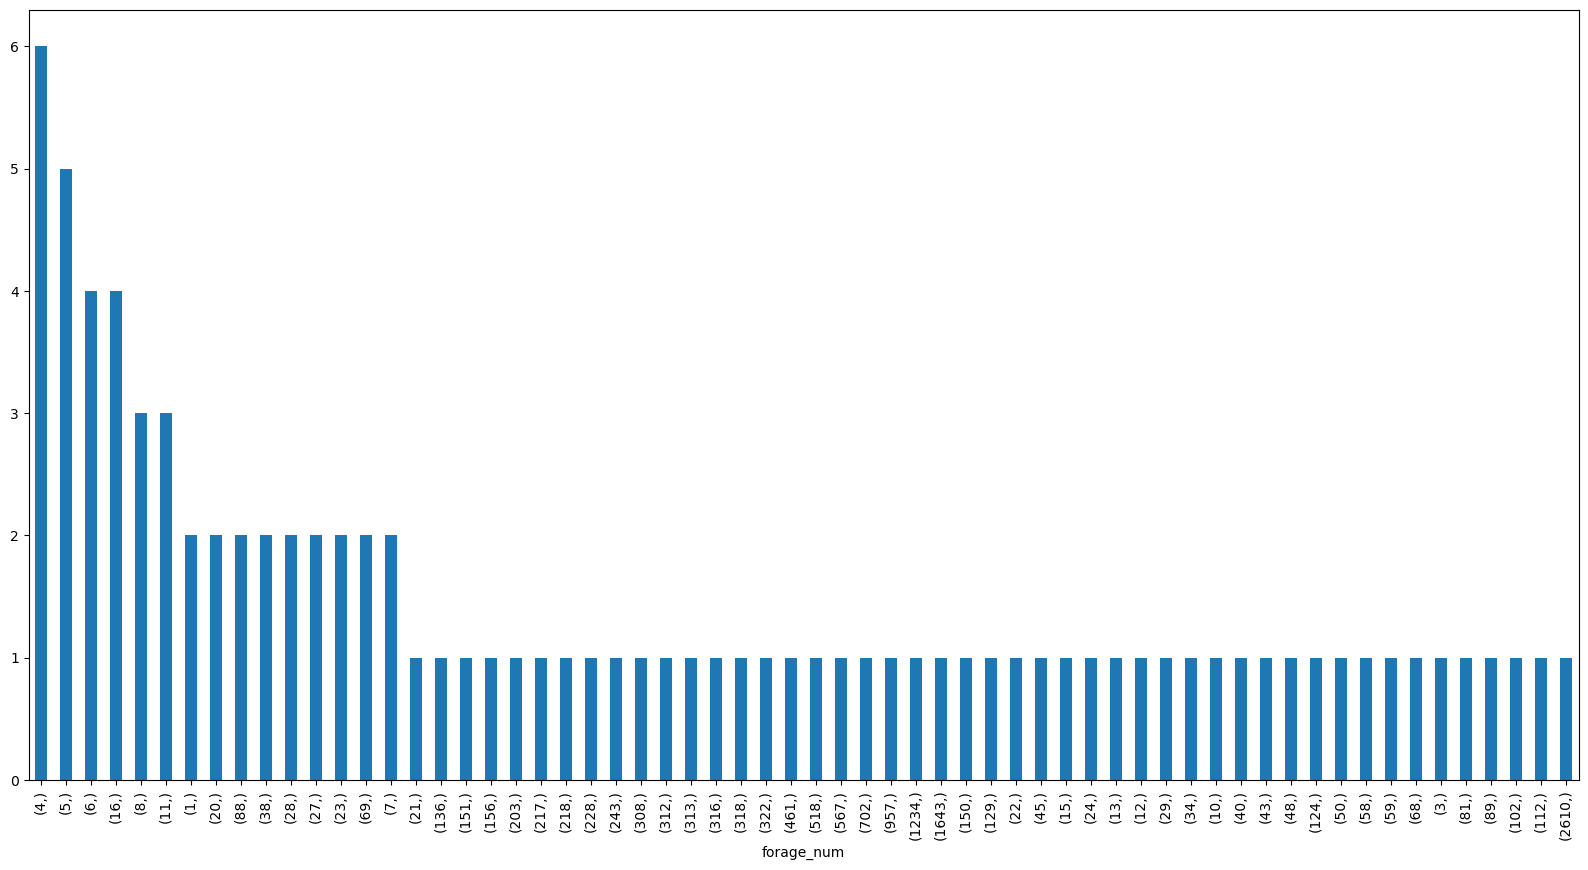

In [44]:
# # Visualize distribution of forage_num in the dataset:
# forage_fish_counts['forage_num'].value_counts().plot(kind='bar')

test = forage_fish_counts[forage_fish_counts['forage_num']!=0].value_counts().plot(kind='bar', figsize=(20,10))
test
# # calculate number of images in 'forage fish true' and downsample the false to match:


In [45]:
forage_fish_counts[forage_fish_counts['forage_num']>2000]

,forage_num
image_id,
5993932,2610


In [46]:
shortened_df[shortened_df['image_id']==5993932]["file_name"]
                                                             

4963     GOPR2943.JPG
4964     GOPR2943.JPG
4965     GOPR2943.JPG
4968     GOPR2943.JPG
4969     GOPR2943.JPG
             ...     
12637    GOPR2943.JPG
12638    GOPR2943.JPG
12639    GOPR2943.JPG
12640    GOPR2943.JPG
12641    GOPR2943.JPG
Name: file_name, Length: 2610, dtype: object

In [47]:
#Now we look at the image with the most forage fish:
from IPython.display import Image, display

# display(Image(filename='/Users/talenrimmer/Desktop/CV4E_Code/images/5993932.jpg'))

In [48]:
test = forage_fish_counts[forage_fish_counts['forage_num']!=0]

# ["image_id"]
# test
# for imagename in test:
#     print(imagename)
test

test2 = test.sample(5)
test2

# for imagename in test2.iterrows():
#     print(imagename)
#     display(Image(filename=f'/Users/talenrimmer/Desktop/CV4E_Code/images/{imagename[0]}.jpg'))



,forage_num
image_id,
5993515,957
5992042,89
5992434,27
5993703,50
5992788,243


In [49]:

# Now we're subsetting the data for just rows that contain values of forage_num <30 and >0:


forage_fish_counts_30 = forage_fish_counts[forage_fish_counts['forage_num']<30]

forage_fish_counts_30 = forage_fish_counts_30[forage_fish_counts_30['forage_num']>0]

forage_fish_counts_30

#Now we're going to find all the rows in shortened_df that contain the image_id values in forage_fish_counts_30:
shortened_df_30 = shortened_df[shortened_df['image_id'].isin(forage_fish_counts_30.index)]

shortened_df_30



,image_id,category_id,annotations_id,file_name,name,is_forage_fish,forage_num
9,5991894,420073,41626929,GOPR0905.JPG,Forage Fish,True,1
10,5991894,420073,41626930,GOPR0905.JPG,Forage Fish,True,1
11,5991894,420073,41626931,GOPR0905.JPG,Forage Fish,True,1
12,5991894,420073,41626932,GOPR0905.JPG,Forage Fish,True,1
13,5991894,420073,41626933,GOPR0905.JPG,Forage Fish,True,1
...,...,...,...,...,...,...,...
7300,5994011,420107,41678765,GOPR3022.JPG,Sch. C. aggregata,True,1
7301,5994011,420107,41678766,GOPR3022.JPG,Sch. C. aggregata,True,1
7302,5994011,420107,41678767,GOPR3022.JPG,Sch. C. aggregata,True,1
7303,5994011,420107,41678768,GOPR3022.JPG,Sch. C. aggregata,True,1


In [50]:
# Now calculate number of images in forage_fish_counts that = True, and downsample the false to match:

# Now we calculate number of images in forage_fish_counts that have the value True
forage_fish_counts_true = forage_fish_counts[forage_fish_counts['forage_num']!=0]

# Now we remove the row that has the image_id 5992343, as it's erronous:
forage_fish_counts_true = forage_fish_counts_true[forage_fish_counts_true.index != 5992343]

# Now we downsample the false values to match the number of true values:
forage_fish_counts_false = forage_fish_counts[forage_fish_counts['forage_num']==0].sample(n=len(forage_fish_counts_true))
forage_fish_counts_false

#Now we create a training dataset with 63 images from the forage_fish_counts_true and from the forage_fish_counts_false dataset, called "training_set"
training_set = pd.concat([forage_fish_counts_true, forage_fish_counts_false])

# Now we concatenate the two dataframes:
# forage_fish_counts_ds = pd.concat([forage_fish_counts_true, forage_fish_counts_false])
# forage_fish_counts_ds





In [51]:
forage_fish_counts_false

,forage_num
image_id,
5993023,0
5994336,0
5994318,0
5993201,0
5992555,0
...,...
5991783,0
5992889,0
5992667,0


In [52]:

#Now we create a training, test, and val set from the forage_fish_counts_true and forage_fish_counts_false datasets:

from sklearn.model_selection import train_test_split

# Split the 'forage_fish_counts_true' dataframe
true_train, true_temp = train_test_split(forage_fish_counts_true, test_size=0.3, random_state=38)
true_val, true_test = train_test_split(true_temp, test_size=(1/3), random_state=38)

# Split the 'forage_fish_counts_false' dataframe
false_train, false_temp = train_test_split(forage_fish_counts_false, test_size=0.3, random_state=38)
false_val, false_test = train_test_split(false_temp, test_size=(1/3), random_state=38)

# Combine the corresponding splits from both datasets
# train = pd.concat([true_train, false_train])
# val = pd.concat([true_val, false_val])
# test = pd.concat([true_test, false_test])

# # Verify the sizes
# print(f"Train size: {len(train)}")
# print(f"Validation size: {len(val)}")
# print(f"Test size: {len(test)}")
import shutil
from pathlib import Path


#creating lists for each combination:
df_list = [[true_train, "train", "ff"],
[false_train, "train", "empty"],
[true_val, "val", "ff"],
[false_val, "val", "empty"],
[true_test, "test", "ff"],
[false_test, "test", "empty"]
]
for df, split_type, class_type in df_list:

    for image_id in df.index.tolist():
        # shutil.copy(f'/Users/talenrimmer/Desktop/CV4E_Code/images/{image_id}.jpg', f'/Users/talenrimmer/Desktop/CV4E_Code/data_split/{split_type}/{class_type}')
        #split type
        #class 
        src_img = f'/Users/talenrimmer/Desktop/CV4E_Code/images/{image_id}.jpg'
        dst_img = f'/Users/talenrimmer/Desktop/CV4E_Code/data_split/{split_type}/{class_type}'
        Path(dst_img).mkdir(parents=True, exist_ok=True) #Checking if the destination img folder exists, if not, create it (for each ff and empty folder)
        shutil.copy(src_img, dst_img)

    



In [53]:
# concatinate .jpg to the image_id column
# Looping through train, and add images that correspond to the image_id to a new folder (called train)
# Looping through val, and add images that correspond to the image_id to a new folder (called val)
# # Looping through test, and add images that correspond to the image_id to a new folder (called test)

# # make the train dataframe into a list
# train_list = train.index.tolist()
# val_list = val.index.tolist()
# test_list = test.index.tolist()

# import shutil

# # Looping through train, and add images that correspond to the image_id to a new folder (called train)
# for image_id in train_list:
#     shutil.copy(f'/Users/talenrimmer/Desktop/CV4E_Code/images/{image_id}.jpg', f'/Users/talenrimmer/Desktop/CV4E_Code/data_split/train/ff')
#     shutil.copy(f'/Users/talenrimmer/Desktop/CV4E_Code/images/{image_id}.jpg', f'/Users/talenrimmer/Desktop/CV4E_Code/data_split/train/empty')


# for image_id in val_list:
#     shutil.copy(f'/Users/talenrimmer/Desktop/CV4E_Code/images/{image_id}.jpg', f'/Users/talenrimmer/Desktop/CV4E_Code/data_split/val/ff')
#     shutil.copy(f'/Users/talenrimmer/Desktop/CV4E_Code/images/{image_id}.jpg', f'/Users/talenrimmer/Desktop/CV4E_Code/data_split/val/empty')

# for image_id in test_list:
#     shutil.copy(f'/Users/talenrimmer/Desktop/CV4E_Code/images/{image_id}.jpg', f'/Users/talenrimmer/Desktop/CV4E_Code/data_split/test/ff')
#     shutil.copy(f'/Users/talenrimmer/Desktop/CV4E_Code/images/{image_id}.jpg', f'/Users/talenrimmer/Desktop/CV4E_Code/data_split/test/empty')